#  Home Loan Eligibility

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,classification_report

In [2]:
df = pd.read_csv("Loan Prediction Dataset.csv")
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df['Loan_ID'].value_counts()

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

In [4]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [5]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [6]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [7]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [8]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [9]:
f=df['Credit_History'].value_counts()

In [10]:
pd.isnull(df['Credit_History'])

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Name: Credit_History, Length: 614, dtype: bool

In [11]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [12]:
# Get unique values and counts of 'credit_history' for each 'loan_status'
unique_counts = df.groupby('Loan_Status')['Credit_History'].value_counts()
# Print the results
print(unique_counts)


Loan_Status  Credit_History
N            1.0                97
             0.0                82
Y            1.0               378
             0.0                 7
Name: Credit_History, dtype: int64


In [13]:
# Get unique values and counts of 'Education' for each 'loan_status'
unique_counts1 = df.groupby('Loan_Status')['Education'].value_counts()

# Print the results
print(unique_counts1)

Loan_Status  Education   
N            Graduate        140
             Not Graduate     52
Y            Graduate        340
             Not Graduate     82
Name: Education, dtype: int64


In [14]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
df.shape

(614, 13)

In [16]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# EDA

<AxesSubplot:xlabel='Gender', ylabel='count'>

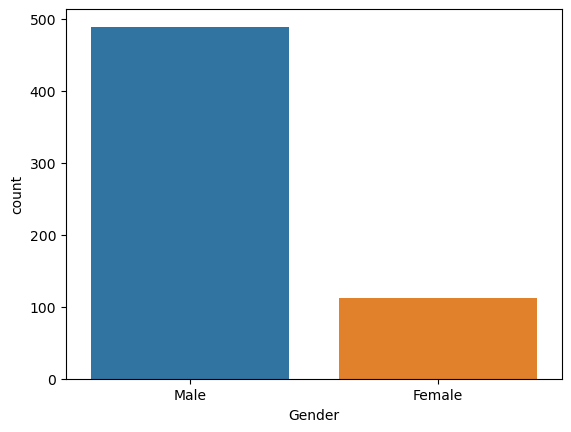

In [18]:
# categorical attributes visualization
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

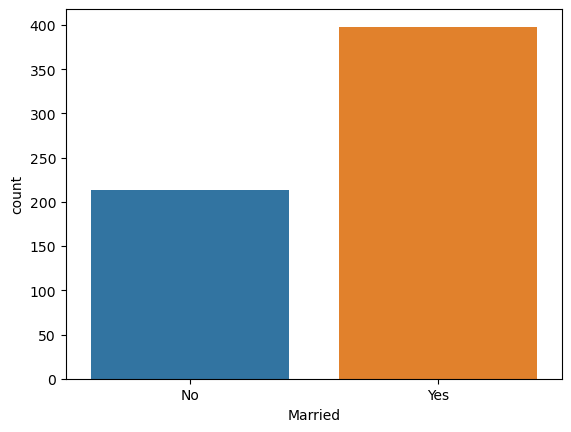

In [19]:
sns.countplot(df['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

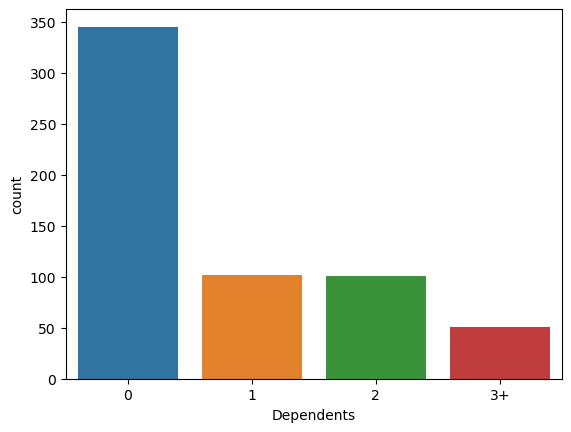

In [20]:
sns.countplot(df['Dependents'])

In [21]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

<AxesSubplot:xlabel='Education', ylabel='count'>

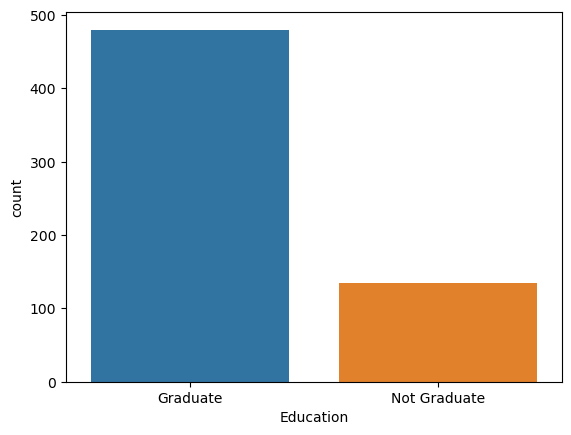

In [22]:
sns.countplot(df['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

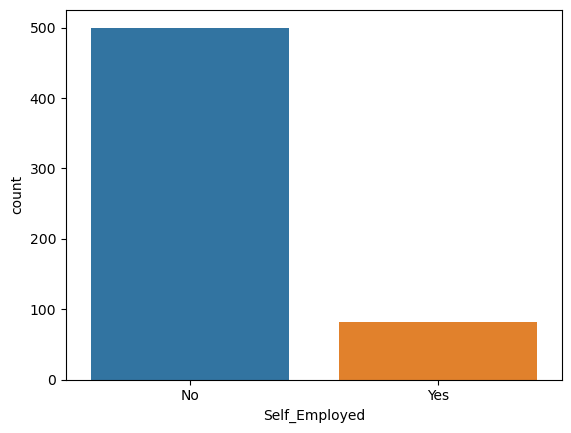

In [23]:
sns.countplot(df['Self_Employed'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

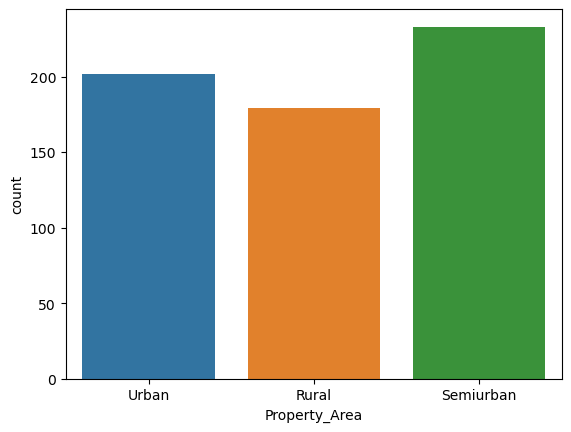

In [24]:
sns.countplot(df['Property_Area'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

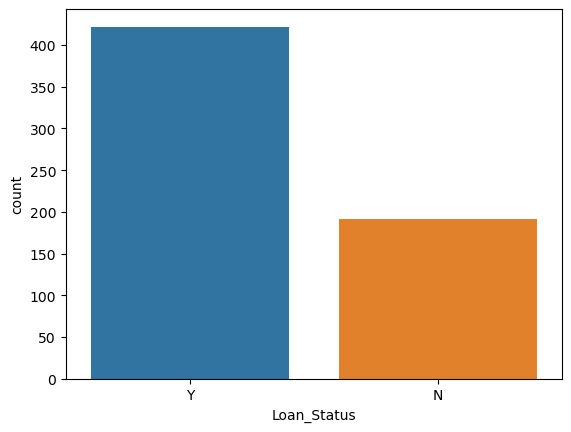

In [25]:
sns.countplot(df['Loan_Status'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

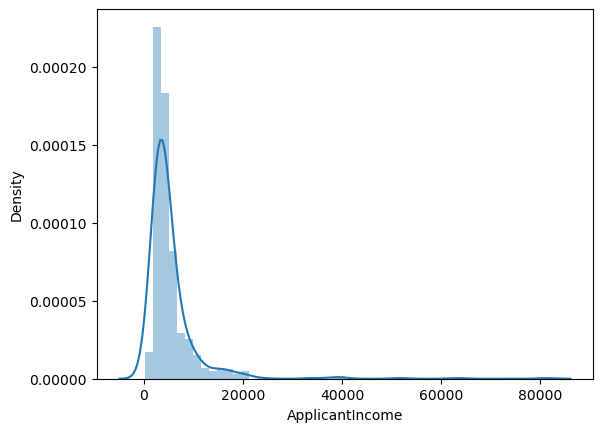

In [26]:
# numerical attributes visualization
sns.distplot(df["ApplicantIncome"])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

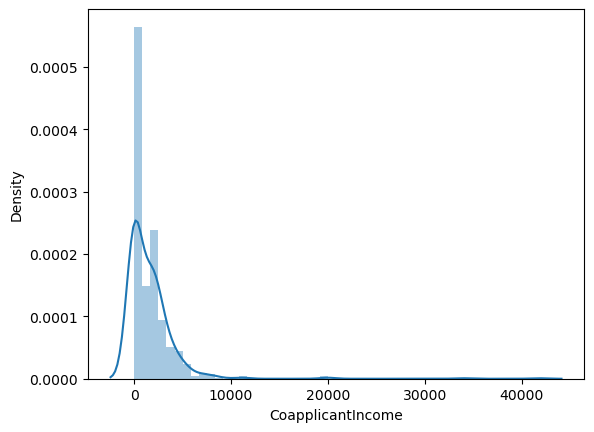

In [27]:
# numerical attributes visualization
sns.distplot(df["CoapplicantIncome"])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

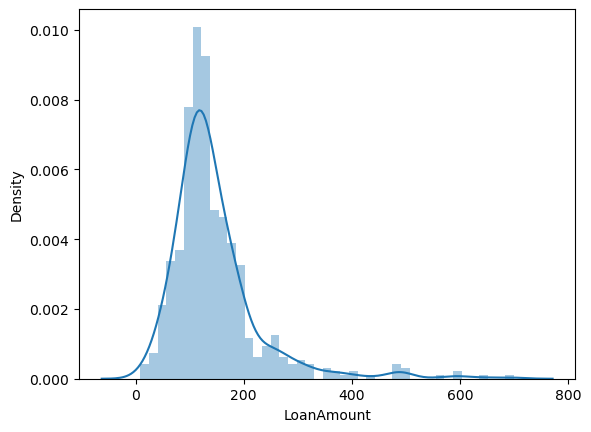

In [28]:
# numerical attributes visualization
sns.distplot(df["LoanAmount"])

In [29]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

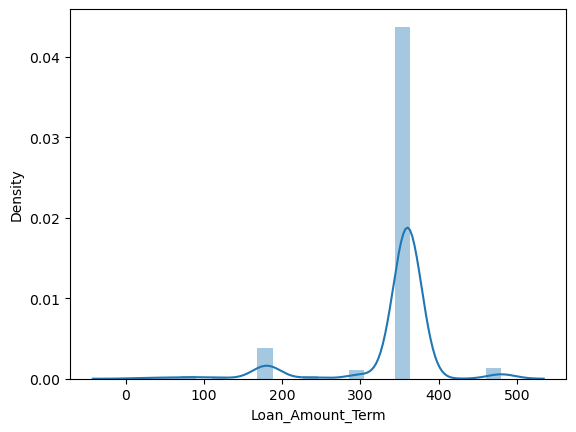

In [30]:
sns.distplot(df['Loan_Amount_Term'])

In [31]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

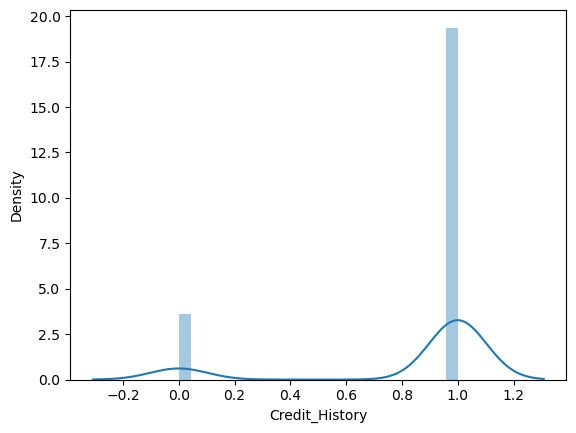

In [32]:
sns.distplot(df['Credit_History'])

# New Attribute

In [33]:
# # total income
# df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
# df.head()

In [34]:
# sns.displot(df['Total_Income'])

# Data Preprocessing

In [35]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
# fill the missing values for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [37]:
# fill the missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [38]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [39]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [40]:
df['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [41]:
# df['Total_Income_Log'] = np.log(df['Total_Income']+1)
# sns.distplot(df["Total_Income_Log"])

<AxesSubplot:>

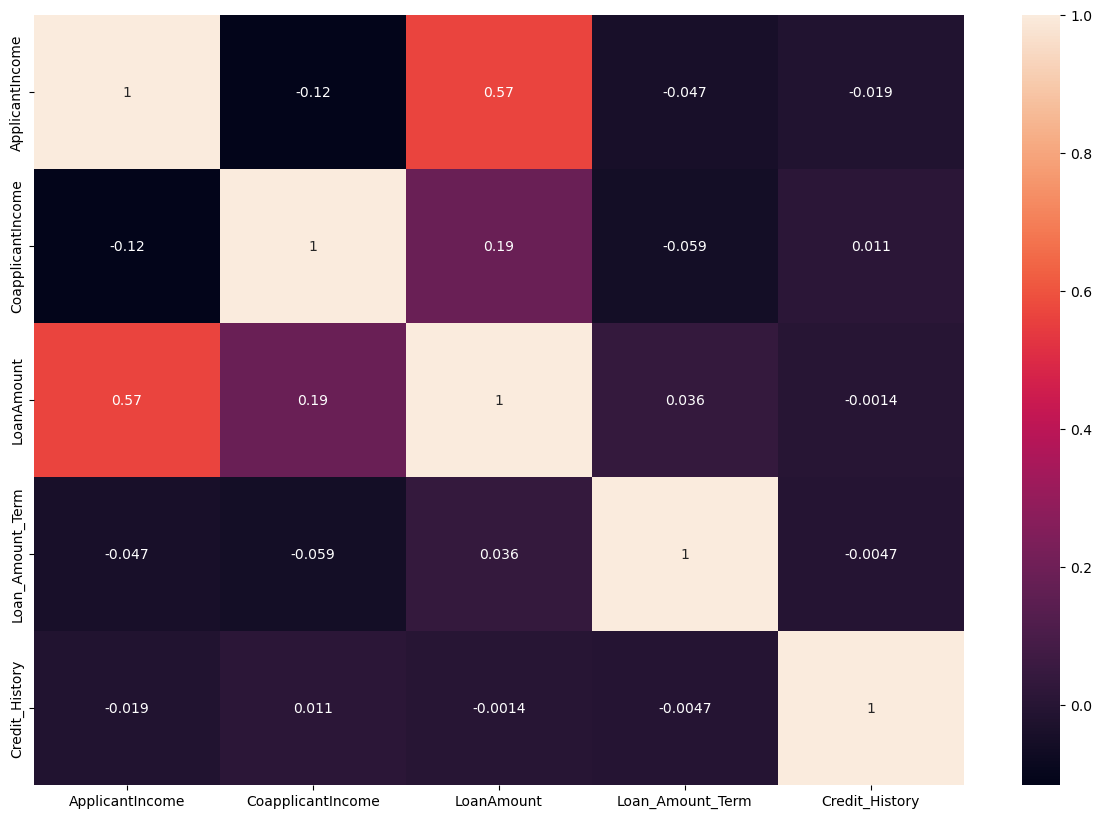

In [42]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True)

In [43]:
# drop unnecessary columns
cols = ['Loan_ID']
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


# Column Transformation

In [44]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Dependents","Education",'Self_Employed',"Property_Area","Loan_Status",]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [45]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [46]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


# Splitting of data

In [47]:
# specify input and output attributes
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((491, 11), (123, 11), (491,), (123,))

# Model Fitting

#  1)DT

In [50]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

# Make predictions
y_pred = tree.predict(X_test)

# Evaluate the model
mae_dt = mean_absolute_error(Y_test, y_pred)
mse_dt = mean_squared_error(Y_test, y_pred)
accuracy_score_dt=accuracy_score(Y_test,y_pred)

print("Mean Absolute Error:", mae_dt)
print("Mean Squared Error:", mse_dt)
print("Accuracy is", accuracy_score_dt)

Mean Absolute Error: 0.2926829268292683
Mean Squared Error: 0.2926829268292683
Accuracy is 0.7073170731707317


# 2)Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,Y_train)
# Make predictions
y_pred1 = model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(Y_test, y_pred1)
mse_rf = mean_squared_error(Y_test, y_pred1)
accuracy_score_rf=accuracy_score(Y_test,y_pred1)
print("Mean Absolute Error:", mae_dt)
print("Mean Squared Error:", mse_dt)
print("Accuracy is", accuracy_score_rf)

Mean Absolute Error: 0.2926829268292683
Mean Squared Error: 0.2926829268292683
Accuracy is 0.7804878048780488


# 3)Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train,Y_train)
# Make predictions
y_pred11 = model1.predict(X_test)

# Evaluate the model
mae_lr = mean_absolute_error(Y_test, y_pred11)
mse_lr = mean_squared_error(Y_test, y_pred11)
accuracy_score_lr=accuracy_score(Y_test,y_pred11)

print("Mean Absolute Error:", mae_lr)
print("Mean Squared Error:", mse_lr)
print("Accuracy is", accuracy_score_lr)

Mean Absolute Error: 0.21138211382113822
Mean Squared Error: 0.21138211382113822
Accuracy is 0.7886178861788617


# 4)GBC

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier()
grad.fit(X_train,Y_train)

# Make predictions
y_pred2 = grad.predict(X_test)

# Evaluate the model
mae_gb = mean_absolute_error(Y_test, y_pred2)
mse_gb = mean_squared_error(Y_test, y_pred2)
accuracy_score_gb=accuracy_score(Y_test,y_pred2)

print("Mean Absolute Error:", mae_gb)
print("Mean Squared Error:", mse_gb)
print("Accuracy is", accuracy_score_gb)

Mean Absolute Error: 0.25203252032520324
Mean Squared Error: 0.25203252032520324
Accuracy is 0.7479674796747967


# 5)KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(X_train,Y_train)
# Make predictions
y_pred3 = knn.predict(X_test)

# Evaluate the model
mae_knn = mean_absolute_error(Y_test, y_pred3)
mse_knn = mean_squared_error(Y_test, y_pred3)
accuracy_score_knn=accuracy_score(Y_test,y_pred3)

print("Mean Absolute Error:", mae_knn)
print("Mean Squared Error:", mse_knn)
print("Accuracy is", accuracy_score_knn)

Mean Absolute Error: 0.42276422764227645
Mean Squared Error: 0.42276422764227645
Accuracy is 0.5772357723577236


# 6) SVM

In [50]:
from sklearn.svm import SVC
svc= SVC(kernel="linear")
svc.fit(X_train,Y_train)
# Make predictions
y_pred4 = svc.predict(X_test)

# Evaluate the model
mae_svc = mean_absolute_error(Y_test, y_pred4)
mse_svc = mean_squared_error(Y_test, y_pred4)
accuracy_score_svc=accuracy_score(Y_test,y_pred4)

print("Mean Absolute Error:", mae_svc)
print("Mean Squared Error:", mse_svc)
print("Accuracy is", accuracy_score_svc)

Mean Absolute Error: 0.2032520325203252
Mean Squared Error: 0.2032520325203252
Accuracy is 0.7967479674796748


#  7)XG Boost

In [56]:
import xgboost as xgb
xgb_model= xgb.XGBClassifier()
xgb_model.fit(X_train,Y_train)

y_pred5=xgb_model.predict(X_test)
# Evaluate the model
mae_xgb = mean_absolute_error(Y_test, y_pred5)
mse_xgb = mean_squared_error(Y_test, y_pred5)
accuracy_score_xgb=accuracy_score(Y_test,y_pred5)

print("Mean Absolute Error:", mae_xgb)
print("Mean Squared Error:", mse_xgb)
print("Accuracy is", accuracy_score_xgb)

Mean Absolute Error: 0.23577235772357724
Mean Squared Error: 0.23577235772357724
Accuracy is 0.7642276422764228


In [64]:
'''
DT = DECISION TREE
LR = Logistic REGRESSION
GBC = GRADIENT BOOSTING CLASSIFIER
#SVM = SUPPORT VECTOR MACHINE
RF = RandomForestRegressoR
KNN= K NEAREST NEIGHBOUR
XGB= XG BOOST CLASSIFIER
'''

model_data_1 = pd.DataFrame({'Models':['DT','RF','LR','GBC','KNN','XGB'],
             "Accuracy score":[accuracy_score_dt,accuracy_score_rf,accuracy_score_lr,accuracy_score_gb,accuracy_score_knn,
                              accuracy_score_xgb]})

In [65]:
model_data_1 

,Models,Accuracy score
0,DT,0.707317
1,RF,0.780488
2,LR,0.788618
3,GBC,0.747967
4,KNN,0.577236
5,XGB,0.764228


# Confusion Matrix

In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred11)
cm

array([[18, 25],
       [ 1, 79]], dtype=int64)

<AxesSubplot:>

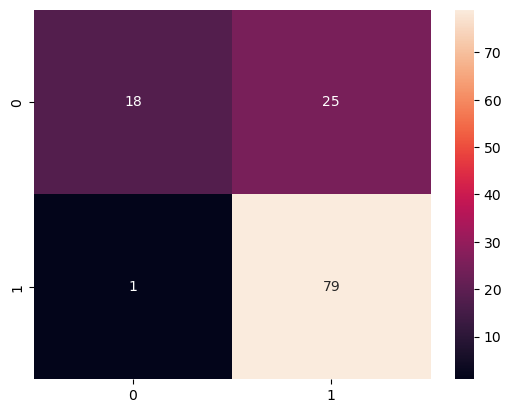

In [67]:
sns.heatmap(cm, annot=True)

In [68]:
print(classification_report(Y_test,y_pred11))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [69]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64